0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Finished Training. 
 MSE: 1.777775632891346
-0.9999999436685884
Accuracy of test: 0.0
Test MSE = 3.999999774674357
0
Finished Training. 
 MSE: 0.009861023541284979
-0.5257612061045909
Accuracy of test: 0.0
Test MSE = 2.3279472580537357
0
Finished Training. 
 MSE: 0.0099982863284547
-0.596650033632046
Accuracy of test: 0.0
Test MSE = 2.5492913298972133
0
1000
2000
Finished Training. 
 MSE: 0.009999273765974924
-0.3381615505332747
Accuracy of test: 0.0
Test MSE = 1.7906763353256179
0
Finished Training. 
 MSE: 0.00829603596906129
-0.37831297730749536
Accuracy of test: 1.0
Test MSE = 0.38649475418427076
0
Finished Training. 
 MSE: 0.009889218508375652
0.7427582775927224
Accuracy of test: 1.0
Test MSE = 0.06617330374706287
0
1000
Finished Training. 
 MSE: 0.009998776579250482
-0.9342522566062131
Accuracy of test: 1.0
Test MSE = 0.004322765761375244
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Finished Training. 
 MSE: 0.12196159501019345
-0.0

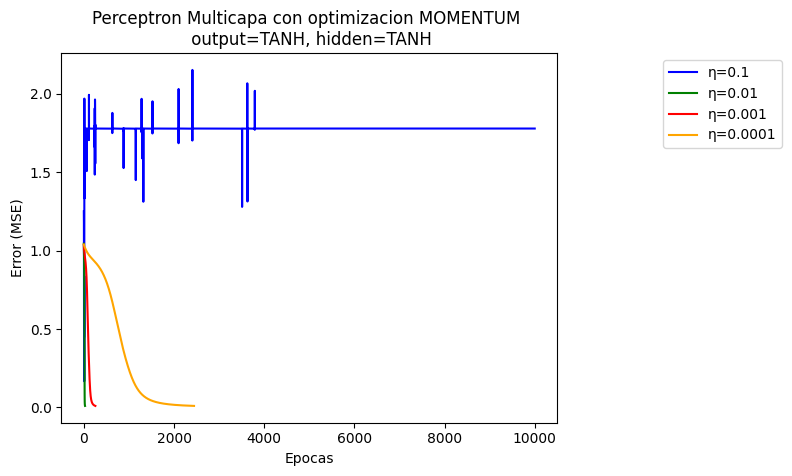

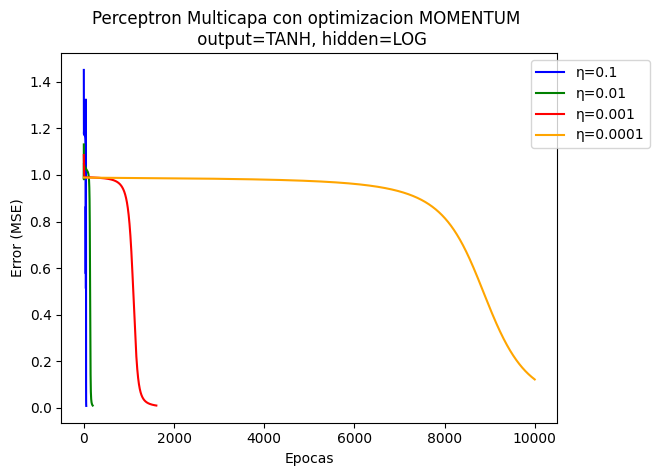

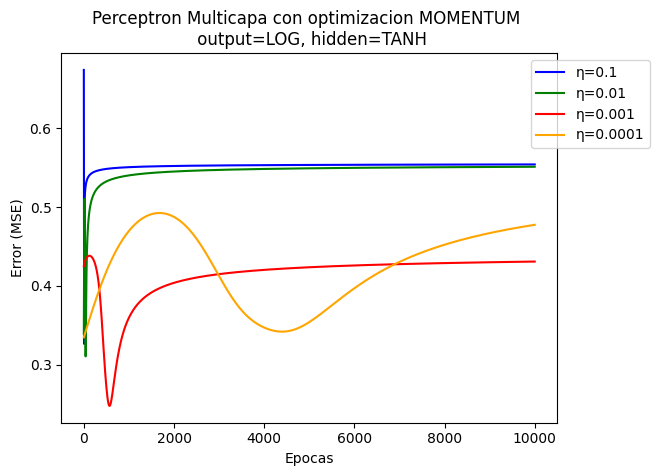

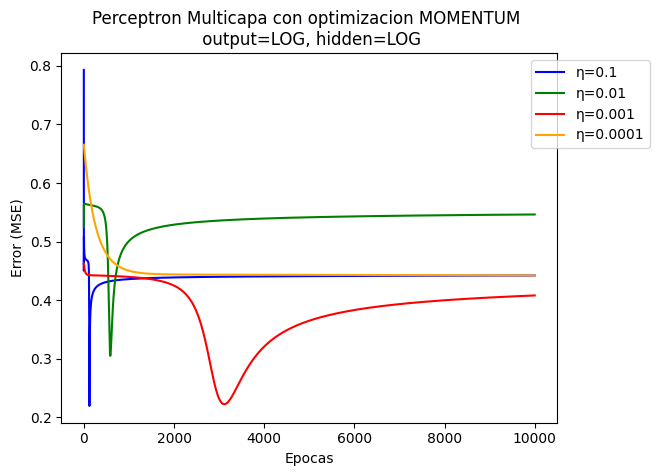

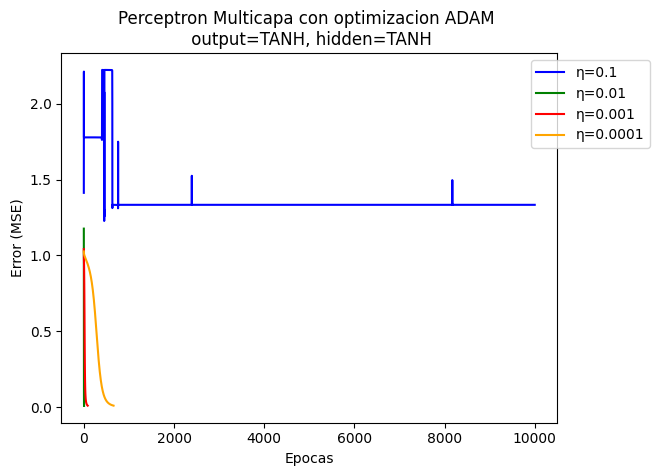

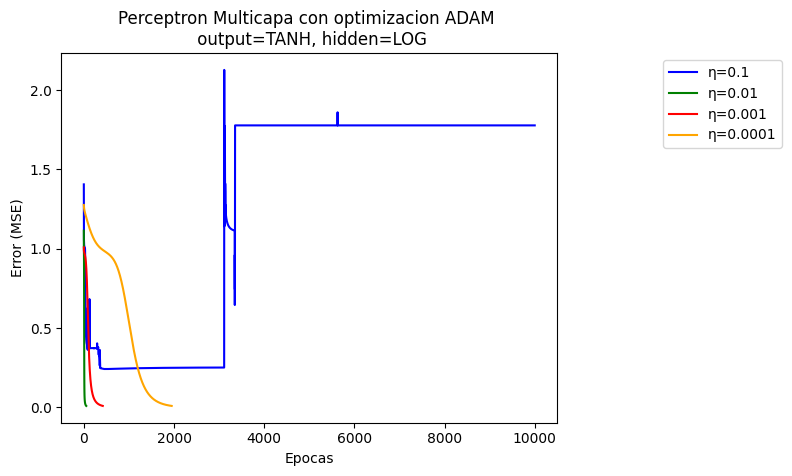

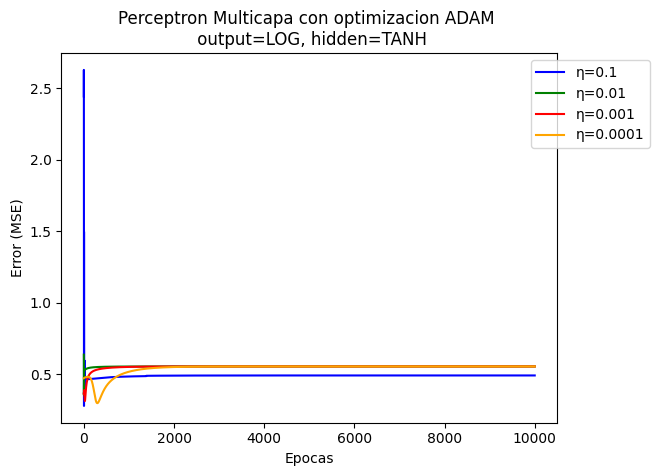

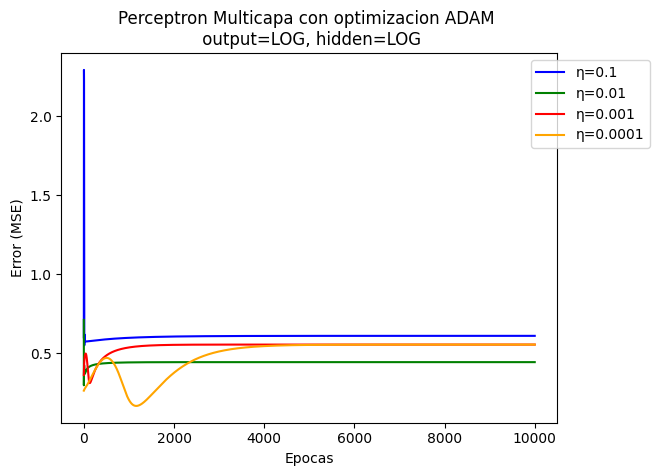

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import parse_nums
from src.perceptron import MultilayerPerceptron

PATH = "./data/Ej3B-digitos.txt"

OUTPUT_ACTIVATION = ["TANH", "LOG"]
HIDDEN_ACTIVATION = ["TANH", "LOG"]
BETA = 1

TRAINING_TYPE = "PERCENTAGE"
K_FOLD = 4
LR = 0.1
BIAS = 1
EPOCHS = 10000
MIN_ERROR = 0.01
TRAINING_PERCENTAGE = 0.9

QTY_HIDDEN_LAYERS = 3
QTY_NODES_IN_HIDDEN_LAYERS = [20, 16, 8]

OPTIMIZER_METHOD = ["MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

input_data, expected_data = parse_nums(PATH, 7, 2)

#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [round(LR*(10**(-i)),4) for i in range(4)]

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for out_act in OUTPUT_ACTIVATION:
        arr_of_error_aux2 = []
        arr_of_epochs_aux2 = []
        for hidden_act in HIDDEN_ACTIVATION:
            arr_of_error_aux3 = []
            arr_of_epochs_aux3 = []
            for lr in lrs:
                perceptron = MultilayerPerceptron(input_data, expected_data, lr, BIAS,
                                                EPOCHS, TRAINING_TYPE, TRAINING_PERCENTAGE, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                out_act, hidden_act, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON, [-1,1])
                mse_errors, total_epochs, acurracy, test_mse = perceptron.train()
                arr_of_error_aux3.append(mse_errors)
                arr_of_epochs_aux3.append(total_epochs)

            arr_of_error_aux2.append(arr_of_error_aux3)
            arr_of_epochs_aux2.append(arr_of_epochs_aux3)

        arr_of_error_aux.append(arr_of_error_aux2)
        arr_of_epochs_aux.append(arr_of_epochs_aux2)

    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange']

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    for j, out_act in enumerate(OUTPUT_ACTIVATION):
        for k, hidden_act in enumerate(HIDDEN_ACTIVATION):
            for s in range(len(arr_of_errors[i][j][k])):
                plt.plot(range(arr_of_epochs[i][j][k][s]), arr_of_errors[i][j][k][s], color=colors[s], label=f"η={lrs[s]}")
            plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={out_act}, hidden={hidden_act}')
            plt.xlabel("Epocas")
            plt.ylabel("Error (MSE)")
            plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
            plt.show()
       

In [7]:
#-------------------------------------------------
# VARIANDO EL PORCENTAJE DE ENTRENAMIENTO
#-------------------------------------------------

OUTPUT_ACTIVATION = "TANH"
HIDDEN_ACTIVATION = "TANH"
BETA = 1.0

TRAINING_TYPE = ["PERCENTAGE"]
LR = 0.01
BIAS = 1
EPOCHS = 10000
MIN_ERROR = 0.01

QTY_HIDDEN_LAYERS = 3
QTY_NODES_IN_HIDDEN_LAYERS = [20, 16, 8]

OPTIMIZER_METHOD = ["MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8
TRAIN_PERCENTAGES = [round(0.1*i,2) for i in range(4,11)]
ITERATIONS = 20

arr_avg_train_mses = []
arr_std_train_mses = []
arr_avg_test_mses = []
arr_std_test_mses = []

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    avg_train_mses = []
    std_train_mses = []
    avg_test_mses = []
    std_test_mses = []
    for p in TRAIN_PERCENTAGES:
        train = []
        test = []
        for iter in range(ITERATIONS):
            perceptron = MultilayerPerceptron(input_data, expected_data, LR, BIAS,
                                                EPOCHS, TRAINING_TYPE, p, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                OUTPUT_ACTIVATION, HIDDEN_ACTIVATION, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON,  [-1,1])
            mse_errors, total_epochs, test_acurracy, test_mse = perceptron.train()
            #Testeo con el que entrene
            train_acurracy, train_mse = perceptron.test(perceptron.train_input_data, perceptron.test_input_data)
            train.append(train_acurracy)
            test.append(test_acurracy)
            
        train_aux = sum(train) / len(train)
        avg_train_mses.append(train_aux)
        error_train = np.std(train) / np.sqrt((len(train)))
        std_train_mses.append(error_train)
        
        test_aux = sum(test) / len(test)
        avg_test_mses.append(test_aux)
        error_test = np.std(test) / np.sqrt((len(test)))
        std_test_mses.append(error_test)
                    
    arr_avg_train_mses.append(avg_train_mses)
    arr_std_train_mses.append(std_train_mses)
    arr_avg_test_mses.append(avg_test_mses)
    arr_std_test_mses.append(std_test_mses)
    
for i, opt_method in enumerate(OPTIMIZER_METHOD):
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_train_mses[i], yerr=arr_std_train_mses[i], color="blue", capsize=4, label="Train")
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_test_mses[i], yerr=arr_std_test_mses[i], color="red", capsize=4, label="Test")
    plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={OUTPUT_ACTIVATION}, hidden={HIDDEN_ACTIVATION}')
    plt.xlabel("Porcentaje de entrenamiento")
    plt.ylabel("MSE")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()

Finished Training
-0.9123293831575234
0.34562824619362886
-0.7801862347238765
Accuracy of test: 0.6666666666666666
Test MSE = 1.2016505198458463
Finished Training
0.9021891962825337
0.9193323510190159
0.4214666584118021
Accuracy of test: 0.3333333333333333
Test MSE = 1.9046570293228182
Finished Training
-0.9192844865237879
-0.12750120380657537
Accuracy of test: 0.5
Test MSE = 0.6388869793505024
Finished Training
-0.9642559052054773
-0.5730603679932408
Accuracy of test: 0.5
Test MSE = 1.2378982808318548


AttributeError: 'MultilayerPerceptron' object has no attribute 'test'